In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
imgs = digits.images
target = digits.target

In [65]:
class Layer(object):
    def __init__(self, n_input, n_output, isBias=False, activation=None, dim=1):
        self.n_input = n_input
        self.n_output = n_output
        self.dim = dim
        self.weight = np.random.normal(size=(n_input, n_output))
#         self.weight = np.random.uniform(size=(n_input, n_output))
#         self.weight = np.random.binomial(10, 0.1, size=(n_input, n_output)).astype(np.float64)
        if isBias:
            self.bias = np.random.normal(size=n_output)
        else:
            self.bias = None
        if activation == 'relu':
            # ReLU
            self.activation = lambda x: np.maximum(x, 0)
        else:
            # Identify
            self.activation = lambda x:x
        
        self.output = None
    
    def __call__(self, x):
        
        h = np.dot(x, self.weight)
        if self.bias is not None:
            h += self.bias
        
        return self.activation(h)
        
    def _neighborhood(self, index):
        dim = self.dim
        if dim == 1:
            neighb = list(map(lambda x: x%(self.n_output), [index-1, index, index+1]))
        elif dim == 2:
            w = int(np.sqrt(self.n_output))
            h = self.n_output // w
            row = index // w
            col = index % w
            neighb = []
            for i in range(3):
                for j in range(3):
                    r = (row + i-1) % h
                    c = (col + j-1) % w
                    neighb.append(int(w*r+c))
            
        return neighb
        
    def update(self, x):
        # TODO: implement mini-batch, batch learnig
        if len(x.shape) == 1:
#             output = self(x) + np.exp(-np.sum(self.weight**2, axis=0))
            output = self(x)
            max_index = np.argmax(output)
            weight_mean = self.weight.mean(axis=1)
            max_weight = self.weight[:, max_index]
            delta = max_weight - weight_mean
            neighborhood = self._neighborhood(max_index)
            alpha = 0.3
            self.weight[:, neighborhood] += output[max_index] * delta[:, np.newaxis]
            self.weight[:, neighborhood] /= np.linalg.norm(self.weight[:, neighborhood], axis=0)
        
#         norm = np.linalg.norm(self.weight, axis=0)
#         self.weight /= 2
        

In [66]:
x_data = imgs.reshape(-1, 8*8)
y_data = target
unit = 6
test_layer = Layer(x_data.shape[1], unit**2, dim=2)

x_data = (x_data - x_data.mean()) / x_data.std()

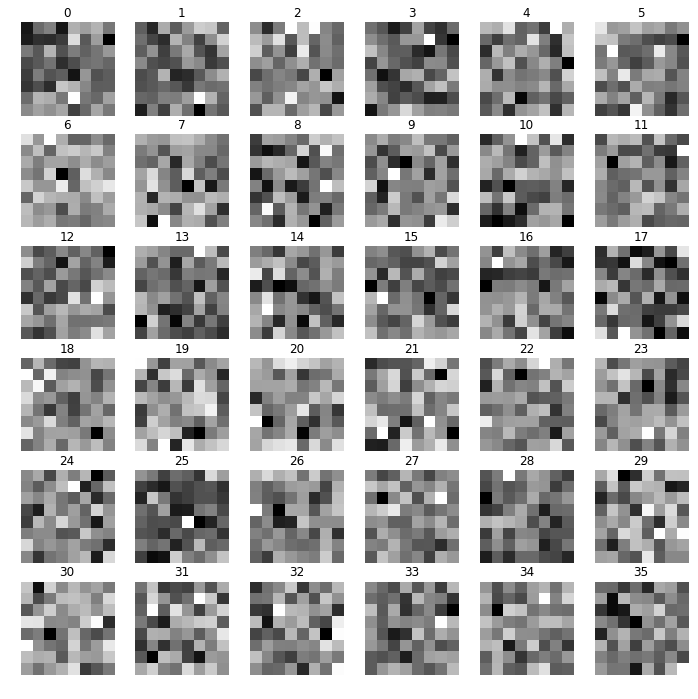

In [67]:
n_row = unit
n_col = unit
n = 2
plt.figure(figsize=(n_row*n, n_col*n))
for i, weight in enumerate(test_layer.weight.transpose((1, 0))):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(weight.reshape(8, 8), cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show()

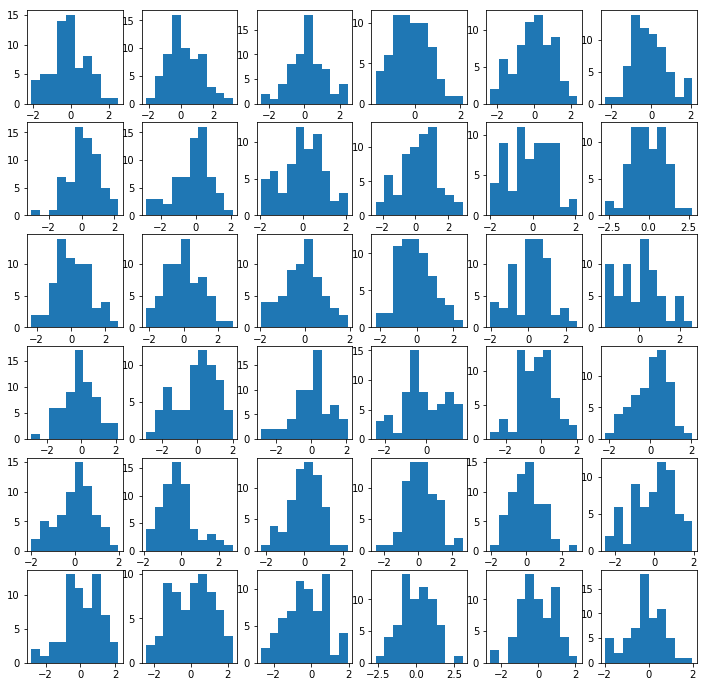

In [68]:
n_row = unit
n_col = unit
n = 2
plt.figure(figsize=(n_row*n, n_col*n))
for i, weight in enumerate(test_layer.weight.transpose((1, 0))):
    plt.subplot(n_row, n_col, i+1)
    plt.hist(weight)
plt.show()

In [69]:
n_epoch = 20
perm = np.random.permutation(len(x_data))
for e in range(n_epoch):
    for i, img in enumerate(x_data[perm]):
        test_layer.update(img)

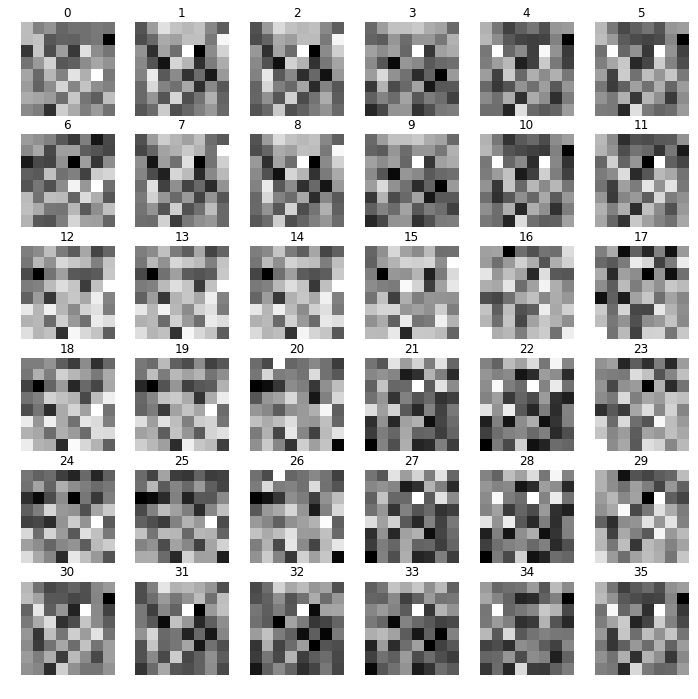

In [70]:
n_row = unit
n_col = unit
n = 2
plt.figure(figsize=(n_row*n, n_col*n))
for i, weight in enumerate(test_layer.weight.transpose((1, 0))):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(weight.reshape(8, 8), cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show()

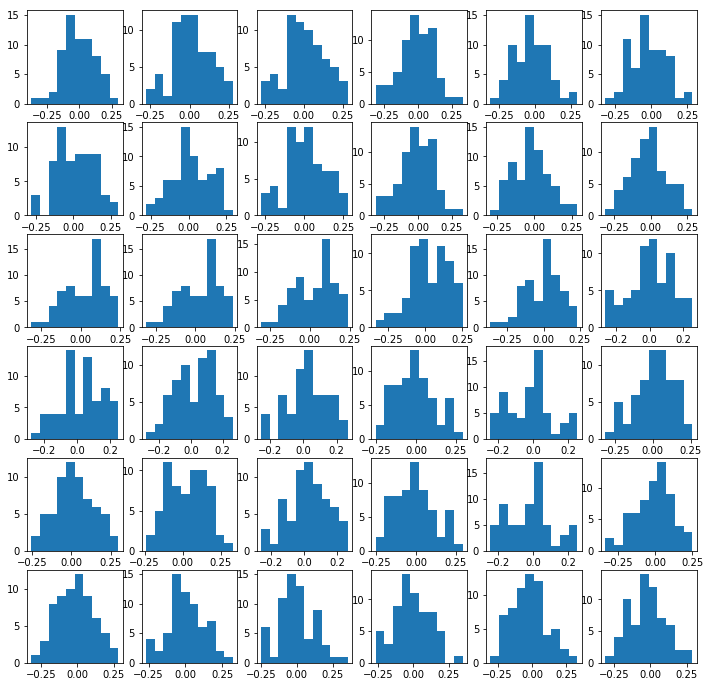

In [71]:
n_row = unit
n_col = unit
n = 2
plt.figure(figsize=(n_row*n, n_col*n))
for i, weight in enumerate(test_layer.weight.transpose((1, 0))):
    plt.subplot(n_row, n_col, i+1)
    plt.hist(weight)
plt.show()

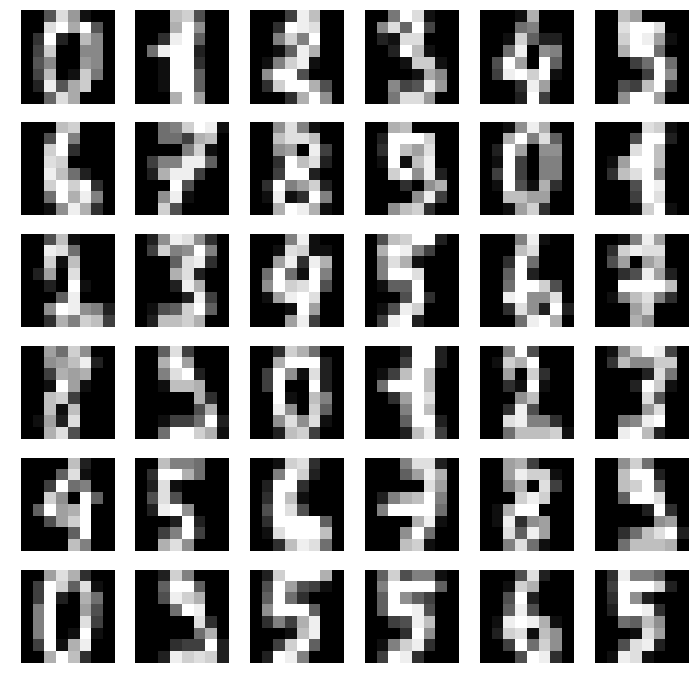

In [72]:
n_row = unit
n_col = unit
n = 2
plt.figure(figsize=(n_row*n, n_col*n))
for i, img in enumerate(x_data[:int(n_row*n_col)]):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(img.reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

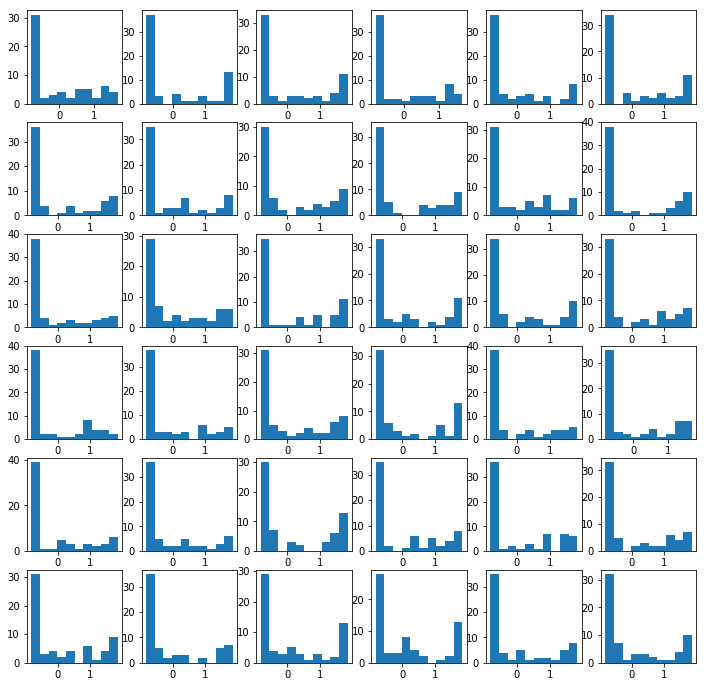

In [73]:
n_row = unit
n_col = unit
n = 2
plt.figure(figsize=(n_row*n, n_col*n))
for i, img in enumerate(x_data[:int(n_row*n_col)]):
    plt.subplot(n_row, n_col, i+1)
    plt.hist(img.reshape(-1))
plt.show()